# <big><b> Flash flood study machine learning  </b></big>

In [104]:
import numpy as np
import pandas as pd
import glob
import sklearn.ensemble as ens
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import pickle

# Thermodynamic variables
THERMO = ['MUCAPE', 'NCAPE', 'DCAPE', 'LCL',
          'PW', '7-5LR', 'MeanRH', 'SfcT', 'SfcTd',
          'DD', 'FZL_AGL', 'WC'] 
#Kinematic variables
KIN = ['0-6km Shear Dir', '0-6km Shear Mag', 'C Dn Dir',
       'C Dn Mag', 'C Up Dir', 'C Up Mag', 'SM Dir',
       'SM Mag', 'MW Dir', 'MW Mag']

In [113]:
for csv in glob.glob("*clean.csv"):
    site_name = csv[:4]
    df = pd.read_csv(csv)
    df2 = df[df['MeanRH'] <= 90] #Don't want rain contaminated dates
    df2.dropna(subset=[KIN + THERMO + ['Result'] ], inplace=True) #Eliminate any NAs that snuck through
    predictors = df2[THERMO + KIN]
    #predictors = df2[['PW', 'MUCAPE', 'FZL_AGL', 'MeanRH', '7-5LR', 'DD', 'LCL']]
    result = df2['Result']
    print 'The dataset for {} has {} entries to be included in model'.format(site_name,
                                                                             df.shape[0])
# Split the dataset into training and test datasets 
    xtrain, xtest, ytrain, ytest = train_test_split(predictors, 
                                                    result, 
                                                    test_size= 0.25) 
    #Hyperparameters based on tuning done below
    clf = ens.RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5)
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    score = metrics.accuracy_score(ytest, y_pred)
    feature_imp = pd.Series(clf.feature_importances_,
                            index=predictors.columns).sort_values(ascending=False)
    #print "With {} trees the accuracy is {:3.2f}".format(size, score)
    print "The model accuracy for {} is {:3.2f}".format(site_name, score)
    print "The most important features for {} are".format(site_name)
  
    top = np.min([10, len(predictors.columns)])
    for i in xrange(top):
        print '{}: {}'.format(i + 1, feature_imp.index[i])
    print '\n'    
    

/Users/nicholascarr/anaconda/envs/flood/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The dataset for K4HV has 120 entries to be included in model
The model accuracy for K4HV is 0.77
The most important features for K4HV are
1: NCAPE
2: MUCAPE
3: C Up Dir
4: C Dn Dir
5: MW Dir
6: SM Dir
7: DD
8: SfcTd
9: 0-6km Shear Dir
10: WC


The dataset for KBCE has 238 entries to be included in model
The model accuracy for KBCE is 0.70
The most important features for KBCE are
1: MW Dir
2: SM Dir
3: C Dn Dir
4: 0-6km Shear Dir
5: C Up Dir
6: MUCAPE
7: 0-6km Shear Mag
8: LCL
9: C Up Mag
10: C Dn Mag


The dataset for KPGA has 154 entries to be included in model
The model accuracy for KPGA is 0.75
The most important features for KPGA are
1: NCAPE
2: MUCAPE
3: 0-6km Shear Dir
4: WC
5: MeanRH
6: C Up Mag
7: LCL
8: DD
9: SM Dir
10: MW Dir


The dataset for KSGU has 123 entries to be included in model
The model accuracy for KSGU is 0.75
The most important features for KSGU are
1: NCAPE
2: MUCAPE
3: FZL_AGL
4: WC
5: MeanRH
6: PW
7: LCL
8: SfcT
9: C Dn Mag
10: MW Dir




In [115]:
# These are the actual probabilites from the forest e.g. what percentage of trees voted for a particular thing for SGU
for i in xrange(len(predictors)):
    noflood = clf.predict_proba([predictors.iloc[i]]) [0, 0]
    flood = clf.predict_proba([predictors.iloc[i]])[0, 1]
    print 'Prob No Flood, Prob Flood, Basins flooded '
    print '{:3.2f},\t \t {:3.2f},\t \t{}'.format(noflood, flood, df2.Basins.iloc[i])
                                                

Prob No Flood, Prob Flood, Basins flooded 
0.81,	 	 0.19,	 	0
Prob No Flood, Prob Flood, Basins flooded 
0.44,	 	 0.56,	 	2
Prob No Flood, Prob Flood, Basins flooded 
0.21,	 	 0.79,	 	2
Prob No Flood, Prob Flood, Basins flooded 
0.61,	 	 0.39,	 	0
Prob No Flood, Prob Flood, Basins flooded 
0.16,	 	 0.84,	 	2
Prob No Flood, Prob Flood, Basins flooded 
0.90,	 	 0.10,	 	0
Prob No Flood, Prob Flood, Basins flooded 
0.79,	 	 0.21,	 	0
Prob No Flood, Prob Flood, Basins flooded 
0.93,	 	 0.07,	 	0
Prob No Flood, Prob Flood, Basins flooded 
0.88,	 	 0.12,	 	0
Prob No Flood, Prob Flood, Basins flooded 
0.20,	 	 0.80,	 	2
Prob No Flood, Prob Flood, Basins flooded 
0.74,	 	 0.26,	 	0
Prob No Flood, Prob Flood, Basins flooded 
0.84,	 	 0.16,	 	2
Prob No Flood, Prob Flood, Basins flooded 
0.33,	 	 0.67,	 	4
Prob No Flood, Prob Flood, Basins flooded 
0.22,	 	 0.78,	 	2
Prob No Flood, Prob Flood, Basins flooded 
0.94,	 	 0.06,	 	0
Prob No Flood, Prob Flood, Basins flooded 
0.37,	 	 0.63,	 	3
Prob No 

In [116]:
#How we get the model back
filename='FFW_model'
pickle.dump(clf, open(filename, 'wb'))

rf = pickle.load(open(filename, 'rb'))

# Visualizing A single tree from forest

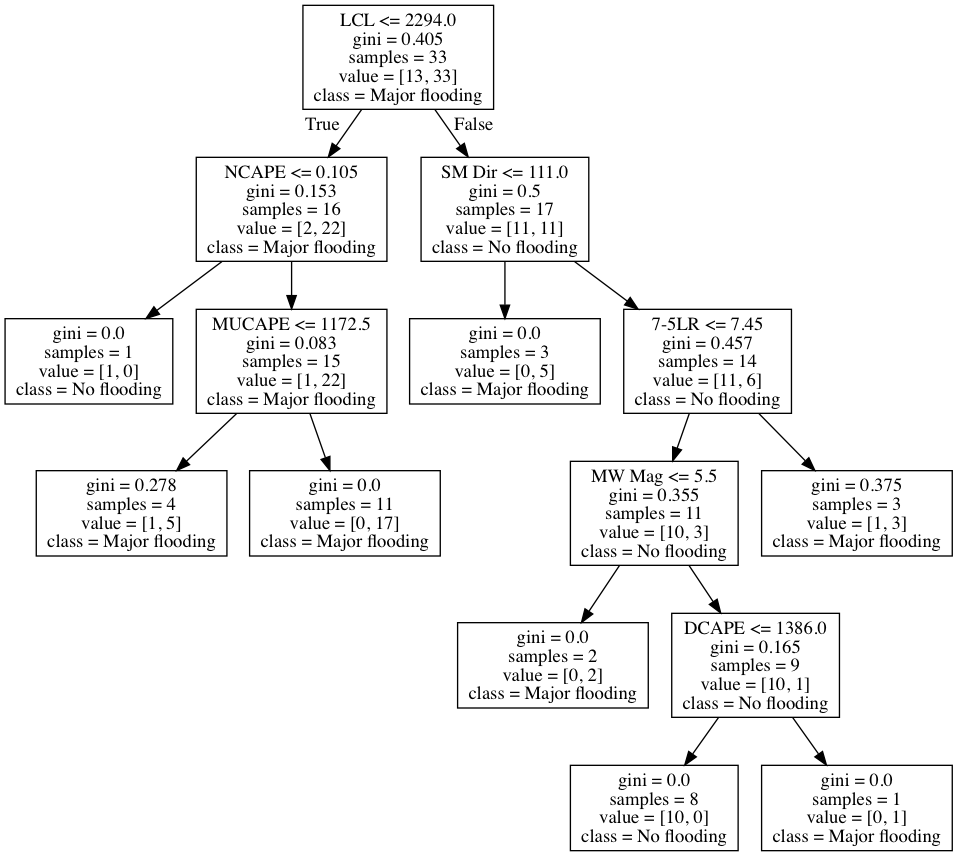

In [117]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
class_names = ['No flooding', 'Major flooding']
# Pull out one tree from the forest
tree = clf.estimators_[9]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = predictors.columns, class_names=class_names)
# Use dot file to create a graph
graph = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
Image('tree.png')

# Hyperparameter Optimization

In [41]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [44]:
clf = ens.RandomForestClassifier(n_estimators=size)
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(xtrain, ytrain)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.7min finished
/Users/nicholascarr/anaconda/envs/flood/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [37]:
new_predictors = df2[feature_imp.index[:10]]

xtrain, xtest, ytrain, ytest = train_test_split(new_predictors, result, test_size= 0.3)
for size in forest_size:
    
    clf = ens.RandomForestClassifier(n_estimators=size)
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    score = metrics.accuracy_score(ytest, y_pred)
    feature_imp = pd.Series(clf.feature_importances_,
                        index=new_predictors.columns).sort_values(ascending=False)
    print feature_imp
    print "With {} trees the accuracy is {:3.2f}".format(size, score )

C Up Dir           0.130486
WC                 0.115741
7-5LR              0.104952
0-6km Shear Mag    0.101884
MUCAPE             0.100508
C Dn Dir           0.092390
MeanRH             0.092262
C Dn Mag           0.091235
NCAPE              0.090335
FZL_AGL            0.080207
dtype: float64
With 50 trees the accuracy is 0.56
C Up Dir           0.130762
MUCAPE             0.120201
7-5LR              0.104593
WC                 0.102077
NCAPE              0.096113
MeanRH             0.095207
C Dn Dir           0.094413
0-6km Shear Mag    0.092826
C Dn Mag           0.087223
FZL_AGL            0.076584
dtype: float64
With 100 trees the accuracy is 0.58
C Up Dir           0.118803
MUCAPE             0.112616
7-5LR              0.104409
WC                 0.099504
0-6km Shear Mag    0.098644
MeanRH             0.097957
FZL_AGL            0.094437
C Dn Dir           0.094178
NCAPE              0.092481
C Dn Mag           0.086972
dtype: float64
With 250 trees the accuracy is 0.58
C Up Dir